In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # for Support Vector Classification model
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix,cohen_kappa_score
from sklearn import metrics

In [3]:
# data = pd.read_csv('./drive/MyDrive/data.csv')

In [4]:
# data

In [5]:
# data.at[:,"Q43A"] = data.iloc[:]['Q3A']
# data.at[:,"Q44A"] = round((data['Q24A'] + data['Q16A'])/2)
# data.at[:,"Q45A"] = data.iloc[:]['Q8A']
# data.at[:,"Q46A"] = data.iloc[:]['Q26A']
# data.at[:,"Q47A"] = data.iloc[:]['Q13A']
# data.at[:,"Q48A"] = data.iloc[:]['Q6A']
# data.at[:,"Q49A"] = data.iloc[:]['Q29A']
# data.at[:,"Q50A"] = round((data['Q7A'] + data['Q2A'] + data['Q15A']+data['Q41A']+data['Q25A'])/5)
# data.at[:,"Q51A"] = data.iloc[:]['Q42A']
# data.at[:,"Q52A"] = data.iloc[:]['Q28A']
# data.at[:,"Q53A"] = data.iloc[:]['Q6A']
# data.at[:,"Q54A"] = round((data['Q35A'] + data['Q18A'])/2)
# data.at[:,"Q55A"] = round((data['Q25A'] + data['Q1A'] + data['Q7A']+data['Q11A']+data['Q12A']+data['Q19A']+data['Q21A']+data['Q23A']+data['Q33A']+data['Q41A'])/10)
# data.at[:,"Q56A"] = round((data['Q22A'] + data['Q8A'])/2)
# data.at[:,"Q57A"] = round((data['Q27A'] + data['Q39A'])/2)

In [6]:
# data.at[:,"Q58A"] = round((data['Q28A'] + data['Q20A'])/2)
# data.at[:,"Q59A"] = round((data['Q40A'] + data['Q33A'])/2)
# data.at[:,"Q60A"] = round((data['Q33A'] + data['Q27A'])/2)
# data.at[:,"Q61A"] = round((data['Q33A'] + data['Q35A'])/2)
# data.at[:,"Q62A"] = round((data['Q12A'] + data['Q38A'] + data['Q34A'])/3)
# data.at[:,"Q63A"] = round((data['Q10A'] + data['Q21A'])/2)
# data.at[:,"Q64A"] = data['Q42A']
# data.at[:,"Q65A"] = round((data['Q37A'] + data['Q31A'])/2)
# data.at[:,"Q66A"] = round((data['Q31A'] + data['Q37A'])/2)



In [7]:
# for i in range(0, 39774):
#   data.at[i, "anxiety_score"] = data.iloc[i]["Q2A"]+data.iloc[i]["Q4A"]+data.iloc[i]["Q7A"]+data.iloc[i]["Q9A"]+data.iloc[i]["Q15A"]+data.iloc[i]["Q19A"]+data.iloc[i]["Q20A"]+data.iloc[i]["Q23A"]+data.iloc[i]["Q25A"]+data.iloc[i]["Q28A"]+data.iloc[i]["Q30A"]+data.iloc[i]["Q36A"]+data.iloc[i]["Q40A"]+data.iloc[i]["Q41A"]+data.iloc[i]["Q48A"]+data.iloc[i]["Q49A"]+data.iloc[i]["Q50A"]+data.iloc[i]["Q51A"]+data.iloc[i]["Q52A"]+data.iloc[i]["Q58A"]+data.iloc[i]["Q59A"]+data.iloc[i]["Q60A"]
#   data.at[i, "stress_score"] = data.iloc[i]["Q1A"]+data.iloc[i]["Q6A"]+data.iloc[i]["Q8A"]+data.iloc[i]["Q11A"]+data.iloc[i]["Q12A"]+data.iloc[i]["Q14A"]+data.iloc[i]["Q18A"]+data.iloc[i]["Q22A"]+data.iloc[i]["Q27A"]+data.iloc[i]["Q29A"]+data.iloc[i]["Q32A"]+data.iloc[i]["Q33A"]+data.iloc[i]["Q35A"]+data.iloc[i]["Q39A"]+data.iloc[i]["Q53A"]+data.iloc[i]["Q54A"]+data.iloc[i]["Q55A"]+data.iloc[i]["Q56A"]+data.iloc[i]["Q57A"]+data.iloc[i]["Q61A"]+data.iloc[i]["Q62A"]+data.iloc[i]["Q63A"]
#   data.at[i, "depression_score"] = data.iloc[i]["Q3A"]+data.iloc[i]["Q5A"]+data.iloc[i]["Q10A"]+data.iloc[i]["Q13A"]+data.iloc[i]["Q16A"]+data.iloc[i]["Q17A"]+data.iloc[i]["Q21A"]+data.iloc[i]["Q24A"]+data.iloc[i]["Q26A"]+data.iloc[i]["Q31A"]+data.iloc[i]["Q34A"]+data.iloc[i]["Q37A"]+data.iloc[i]["Q38A"]+data.iloc[i]["Q42A"]+data.iloc[i]["Q43A"]+data.iloc[i]["Q44A"]+data.iloc[i]["Q45A"]+data.iloc[i]["Q46A"]+data.iloc[i]["Q47A"]+data.iloc[i]["Q64A"] +data.iloc[i]["Q65A"] +data.iloc[i]["Q66A"]  

In [8]:
# # for i in range(0, 39774):
#   # print(data.iloc[i]["anxiety_score"])

# # a = data['anxiety_score']
# a = data.sort_values('anxiety_score')
# print("anxiety score:\n" , a['anxiety_score'])
# print(a['anxiety_score'].value_counts())


# b = data.sort_values('stress_score')
# print("\nstress score:\n", b['stress_score'])
# print(a['stress_score'].value_counts())

# c = data.sort_values('depression_score')
# print("\ndepression score:\n", c['depression_score'])
# print(a['depression_score'].value_counts())

In [9]:
# for i in range(0, 39774):
#   if data.iloc[i]["anxiety_score"]>=0 and data.iloc[i]["anxiety_score"]<=19:
#     data.at[i, "anxiety_level"] = 1
#   elif data.iloc[i]["anxiety_score"]>=20 and data.iloc[i]["anxiety_score"]<=24:
#     data.at[i, "anxiety_level"] = 2
#   elif data.iloc[i]["anxiety_score"]>=25 and data.iloc[i]["anxiety_score"]<=28:
#     data.at[i, "anxiety_level"] = 3
#   elif data.iloc[i]["anxiety_score"]>=29 and data.iloc[i]["anxiety_score"]<=34:
#     data.at[i, "anxiety_level"] = 4
#   elif data.iloc[i]["anxiety_score"]>=35:
#     data.at[i, "anxiety_level"] = 5

#   if data.iloc[i]["stress_score"]>=0 and data.iloc[i]["stress_score"]<=24:
#     data.at[i, "stress_level"] = 1
#   elif data.iloc[i]["stress_score"]>=25 and data.iloc[i]["stress_score"]<=29:
#     data.at[i, "stress_level"] = 2
#   elif data.iloc[i]["stress_score"]>=30 and data.iloc[i]["stress_score"]<=34:
#     data.at[i, "stress_level"] = 3
#   elif data.iloc[i]["stress_score"]>=35 and data.iloc[i]["stress_score"]<=41:
#     data.at[i, "stress_level"] = 4
#   elif data.iloc[i]["stress_score"]>=42:
#     data.at[i, "stress_level"] = 5

#   if data.iloc[i]["depression_score"]>=0 and data.iloc[i]["depression_score"]<=18:
#     data.at[i, "depression_level"] = 1
#   elif data.iloc[i]["depression_score"]>=19 and data.iloc[i]["depression_score"]<=27:
#     data.at[i, "depression_level"] = 2
#   elif data.iloc[i]["depression_score"]>=28 and data.iloc[i]["depression_score"]<=32:
#     data.at[i, "depression_level"] = 3
#   elif data.iloc[i]["depression_score"]>=33 and data.iloc[i]["depression_score"]<=37:
#     data.at[i, "depression_level"] = 4
#   elif data.iloc[i]["depression_score"]>=38:
#     data.at[i, "depression_level"] = 5

In [10]:
# for i in range(0, 39774):
#   print(data.iloc[i][["anxiety_level", "stress_level", "depression_level"]])

In [11]:
data = pd.read_csv('./drive/MyDrive/nnewdata.csv')

In [12]:
x_a = data[["Q2A", "Q4A", "Q7A", "Q9A", "Q15A", "Q19A", "Q20A", "Q23A", "Q25A", "Q28A", "Q30A", "Q36A", "Q40A", "Q41A", "Q48A", "Q49A", "Q50A", "Q51A", "Q52A", "Q58A", "Q59A", "Q60A"] + [f'TIPI{i}' for i in range(1, 11)] + [f'VCL{i}' for i in range(1, 17)] + ["education", "urban", "gender", "age", "hand", "orientation", "married"]]
y_a = data[["anxiety_level"]]

x_s = data[["Q1A", "Q6A", "Q8A", "Q11A", "Q12A", "Q14A", "Q18A", "Q22A", "Q27A", "Q29A", "Q32A", "Q33A", "Q35A", "Q39A", "Q53A", "Q54A", "Q55A", "Q56A", "Q57A", "Q61A", "Q62A", "Q63A"] + [f'TIPI{i}' for i in range(1, 11)] + [f'VCL{i}' for i in range(1, 17)] + ["education", "urban", "gender", "age", "hand", "orientation", "married"]]
y_s = data[["stress_level"]]

x_d = data[["Q3A", "Q5A", "Q10A", "Q13A", "Q16A", "Q17A", "Q21A", "Q24A", "Q26A", "Q31A", "Q34A", "Q37A", "Q38A", "Q42A", "Q43A", "Q44A", "Q45A", "Q46A", "Q47A", "Q64A", "Q65A", "Q66A"] + [f'TIPI{i}' for i in range(1, 11)] + [f'VCL{i}' for i in range(1, 17)] + ["education", "urban", "gender", "age", "hand", "orientation", "married"]]
y_d = data[["depression_level"]]

In [13]:
print(x_a)
print(y_a["anxiety_level"])
y_a["anxiety_level"].value_counts()

       Q2A  Q4A  Q7A  Q9A  Q15A  Q19A  Q20A  Q23A  Q25A  Q28A  ...  VCL14  \
0        4    4    4    2     4     3     3     4     4     3  ...      1   
1        1    3    3    3     3     1     1     1     2     4  ...      1   
2        1    1    1    2     4     2     1     2     2     1  ...      1   
3        3    1    4    3     2     1     2     1     1     1  ...      1   
4        2    4    4    4     4     4     4     4     4     4  ...      1   
...    ...  ...  ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
39769    1    2    1    1     1     4     3     1     2     2  ...      1   
39770    4    4    4    3     4     4     4     3     3     3  ...      1   
39771    1    1    1    2     1     1     1     1     1     1  ...      0   
39772    1    2    3    3     1     1     2     1     1     3  ...      1   
39773    1    1    1    1     1     4     3     1     2     2  ...      0   

       VCL15  VCL16  education  urban  gender  age  hand  orientation  marr

5    31769
4     4762
3     2256
2      987
Name: anxiety_level, dtype: int64

In [14]:
print(x_s)
print(y_s["stress_level"])
y_s["stress_level"].value_counts()

       Q1A  Q6A  Q8A  Q11A  Q12A  Q14A  Q18A  Q22A  Q27A  Q29A  ...  VCL14  \
0        4    4    4     4     4     4     4     4     4     4  ...      1   
1        4    4    4     2     2     4     2     3     3     3  ...      1   
2        3    3    3     2     1     1     2     3     2     2  ...      1   
3        2    3    2     2     1     4     1     1     4     3  ...      1   
4        2    2    4     2     4     4     4     3     2     2  ...      1   
...    ...  ...  ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
39769    2    2    3     2     2     2     2     3     2     3  ...      1   
39770    3    4    4     4     4     4     3     4     3     3  ...      1   
39771    2    1    1     1     1     1     1     1     2     2  ...      0   
39772    3    3    4     3     3     4     3     4     4     3  ...      1   
39773    2    2    1     3     1     1     3     2     3     3  ...      0   

       VCL15  VCL16  education  urban  gender  age  hand  orien

5    30436
4     4680
3     2405
2     1583
1      670
Name: stress_level, dtype: int64

In [15]:
print(x_d)
print(y_d["depression_level"])
y_d["depression_level"].value_counts()

       Q3A  Q5A  Q10A  Q13A  Q16A  Q17A  Q21A  Q24A  Q26A  Q31A  ...  VCL14  \
0        2    4     1     4     4     3     1     4     4     4  ...      1   
1        2    4     2     4     3     4     2     2     3     2  ...      1   
2        4    4     4     4     4     4     4     4     1     4  ...      1   
3        2    3     3     1     2     3     1     1     2     3  ...      1   
4        3    4     3     4     3     4     3     2     4     3  ...      1   
...    ...  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
39769    3    3     4     4     3     4     4     3     3     4  ...      1   
39770    3    3     4     4     4     3     4     4     4     4  ...      1   
39771    2    1     1     2     1     1     1     2     1     2  ...      0   
39772    2    3     1     4     1     2     2     2     3     2  ...      1   
39773    2    4     1     3     4     4     4     2     2     2  ...      0   

       VCL15  VCL16  education  urban  gender  age 

5    31452
2     2872
4     2865
3     2585
Name: depression_level, dtype: int64

In [16]:
# Splitting the dataset into the Training set and Test set
x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, test_size = 0.25, random_state = 0)
x_s_train, x_s_test, y_s_train, y_s_test = train_test_split(x_s, y_s, test_size = 0.25, random_state = 0)
x_d_train, x_d_test, y_d_train, y_d_test = train_test_split(x_d, y_d, test_size = 0.25, random_state = 0)

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Define the parameter values to explore
param_values = np.linspace(0.1, 1.0, 10)
errors = []

# Train and evaluate the model for each parameter value
for param in param_values:
    model = SVC(kernel='rbf', C=param, gamma='scale')
    model.fit(x_a_train, y_a_train)
    y_a_pred = model.predict(x_a_test)
    errors.append(mean_squared_error(y_a_test, y_a_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

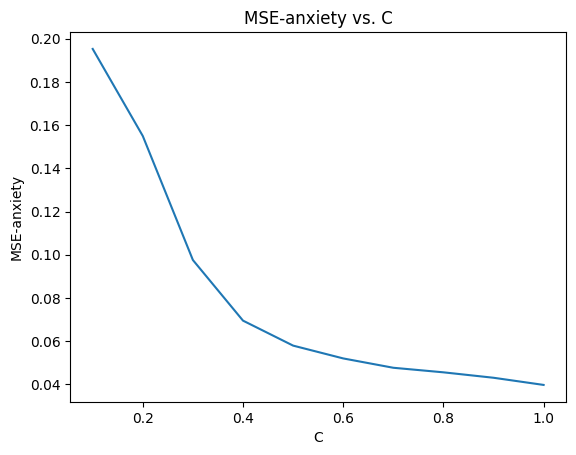

[[5 5]
 [5 5]
 [5 5]
 ...
 [5 5]
 [4 3]
 [5 5]]


In [18]:
# Plot the error values
plt.plot(param_values, errors)
plt.xlabel('C')
plt.ylabel('MSE-anxiety')
plt.title('MSE-anxiety vs. C')
plt.show()
y_a_test = y_a_test.values
print(np.concatenate((y_a_pred.reshape(len(y_a_pred),1), y_a_test.reshape(len(y_a_test),1)),1))

In [19]:
# # Training the RBF Classification model on the Training set
# # Predicting the Test set results
# classifier = SVC(kernel='rbf', probability=True)
# classifier.fit(x_a_train, y_a_train)
# y_a_pred = classifier.predict(x_a_test)
# y_a_test = y_a_test.values
# print(np.concatenate((y_a_pred.reshape(len(y_a_pred),1), y_a_test.reshape(len(y_a_test),1)),1))

In [20]:
# Define the parameter values to explore
param_values = np.linspace(0.1, 1.0, 10)
errors = []

# Train and evaluate the model for each parameter value
for param in param_values:
    model = SVC(kernel='rbf', C=param, gamma='scale')
    model.fit(x_s_train, y_s_train)
    y_s_pred = model.predict(x_s_test)
    errors.append(mean_squared_error(y_s_test, y_s_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

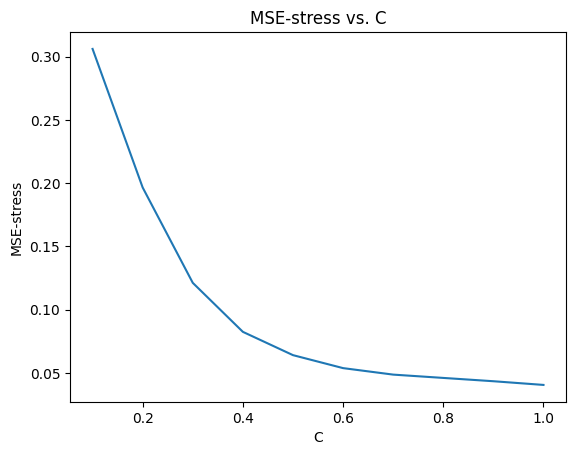

[[5 5]
 [5 5]
 [2 2]
 ...
 [5 5]
 [2 1]
 [5 5]]


In [21]:
# Plot the error values
plt.plot(param_values, errors)
plt.xlabel('C')
plt.ylabel('MSE-stress')
plt.title('MSE-stress vs. C')
plt.show()
y_s_test = y_s_test.values
print(np.concatenate((y_s_pred.reshape(len(y_s_pred),1), y_s_test.reshape(len(y_s_test),1)),1))

In [22]:
# # Training the RBF Classification model on the Training set
# # Predicting the Test set results
# classifier1 = SVC(kernel='rbf', probability=True)
# classifier1.fit(x_s_train, y_s_train)
# y_s_pred = classifier1.predict(x_s_test)
# y_s_test = y_s_test.values
# print(np.concatenate((y_s_pred.reshape(len(y_s_pred),1), y_a_test.reshape(len(y_s_test),1)),1))

In [23]:
# Define the parameter values to explore
param_values = np.linspace(0.1, 1.0, 10)
errors = []

# Train and evaluate the model for each parameter value
for param in param_values:
    model = SVC(kernel='rbf', C=param, gamma='scale')
    model.fit(x_d_train, y_d_train)
    y_d_pred = model.predict(x_d_test)
    errors.append(mean_squared_error(y_d_test, y_d_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

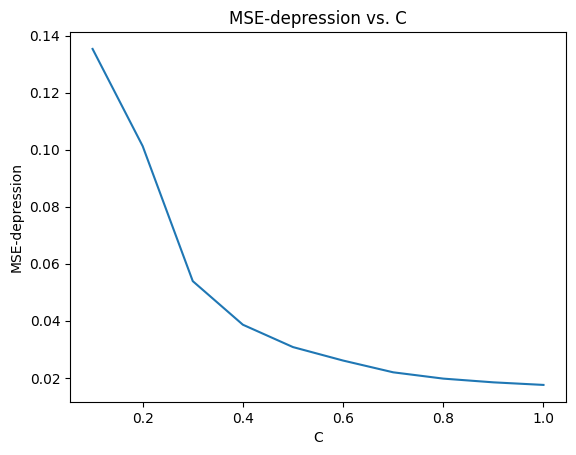

[[5 5]
 [5 5]
 [3 3]
 ...
 [5 5]
 [2 2]
 [5 5]]


In [24]:
# Plot the error values
plt.plot(param_values, errors)
plt.xlabel('C')
plt.ylabel('MSE-depression')
plt.title('MSE-depression vs. C')
plt.show()
y_d_test = y_d_test.values
print(np.concatenate((y_d_pred.reshape(len(y_d_pred),1), y_d_test.reshape(len(y_d_test),1)),1))

In [30]:
# # Training the RBF Classification model on the Training set
# # Predicting the Test set results
# classifier2 = SVC(kernel='rbf', probability=True)
# classifier2.fit(x_d_train, y_d_train)
# y_d_pred = classifier2.predict(x_d_test)
# y_d_test = y_d_test.values
# print(np.concatenate((y_d_pred.reshape(len(y_d_pred),1), y_d_test.reshape(len(y_d_test),1)),1))

In [31]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(np.reshape(actual_class, -1))
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

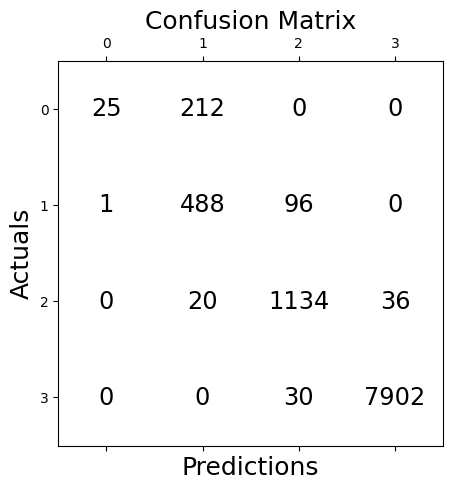



Accuracy:  96.0277554304103 %

Error Rate:  3.9722445695897 %


              precision    recall  f1-score   support

           2       0.96      0.11      0.19       237
           3       0.68      0.83      0.75       585
           4       0.90      0.95      0.93      1190
           5       1.00      1.00      1.00      7932

    accuracy                           0.96      9944
   macro avg       0.88      0.72      0.71      9944
weighted avg       0.96      0.96      0.95      9944



ROC Area:  {2: 0.5526911068136049, 3: 0.9046995305035694, 4: 0.9692738781599, 5: 0.9891626038022997}


Kappa Score:  0.8844474657949049


In [32]:
# Making the Confusion Matrix and finding accuracy
cm_a = confusion_matrix(y_a_test, y_a_pred)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
cmap_custom = plt.cm.colors.ListedColormap(['white'])
ax.matshow(cm_a, cmap=cmap_custom, alpha=0.3)
for i in range(cm_a.shape[0]):
    for j in range(cm_a.shape[1]):
        ax.text(x=j, y=i,s=cm_a[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print("\n\nAccuracy: ",accuracy_score(y_a_test, y_a_pred)*100, "%")

print("\nError Rate: ",(1-accuracy_score(y_a_test, y_a_pred))*100, "%\n\n")

print(metrics.classification_report(y_a_test, y_a_pred))

roc_auc_dict = roc_auc_score_multiclass(y_a_test, y_a_pred)
print("\n\nROC Area: ", roc_auc_dict)

print("\n\nKappa Score: ",cohen_kappa_score(y_a_test, y_a_pred))

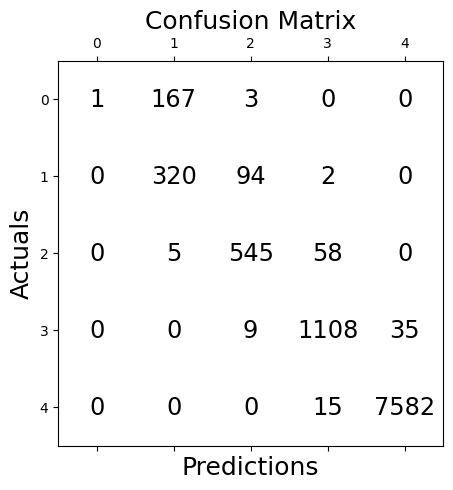



Accuracy:  96.09814963797265 %

Error Rate:  3.901850362027348 %


              precision    recall  f1-score   support

           1       1.00      0.01      0.01       171
           2       0.65      0.77      0.70       416
           3       0.84      0.90      0.87       608
           4       0.94      0.96      0.95      1152
           5       1.00      1.00      1.00      7597

    accuracy                           0.96      9944
   macro avg       0.88      0.73      0.71      9944
weighted avg       0.96      0.96      0.95      9944



ROC Area:  {1: 0.5029239766081871, 2: 0.8755893560679454, 3: 0.942513840030668, 4: 0.9766375366494794, 5: 0.9915564409717267}


Kappa Score:  0.9012050191891496


In [33]:
# Making the Confusion Matrix and finding accuracy
cm_s = confusion_matrix(y_s_test, y_s_pred)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
cmap_custom = plt.cm.colors.ListedColormap(['white'])
ax.matshow(cm_s, cmap=cmap_custom, alpha=0.3)
for i in range(cm_s.shape[0]):
    for j in range(cm_s.shape[1]):
        ax.text(x=j, y=i,s=cm_s[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print("\n\nAccuracy: ",accuracy_score(y_s_test, y_s_pred)*100, "%")

print("\nError Rate: ",(1-accuracy_score(y_s_test, y_s_pred))*100, "%\n\n")

print(metrics.classification_report(y_s_test, y_s_pred))

roc_auc_dict = roc_auc_score_multiclass(y_s_test, y_s_pred)
print("\n\nROC Area: ", roc_auc_dict)

print("\n\nKappa Score: ",cohen_kappa_score(y_s_test, y_s_pred))

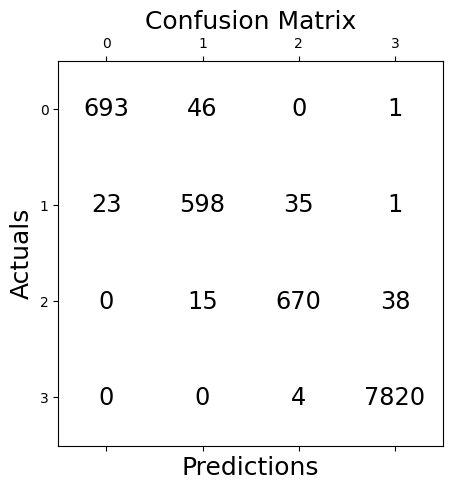



Accuracy:  98.36082059533386 %

Error Rate:  1.6391794046661357 %


              precision    recall  f1-score   support

           2       0.97      0.94      0.95       740
           3       0.91      0.91      0.91       657
           4       0.94      0.93      0.94       723
           5       0.99      1.00      1.00      7824

    accuracy                           0.98      9944
   macro avg       0.95      0.94      0.95      9944
weighted avg       0.98      0.98      0.98      9944



ROC Area:  {2: 0.966993786485312, 3: 0.9518147738963108, 4: 0.9612324264941577, 5: 0.9903104140139677}


Kappa Score:  0.954864300121695


In [34]:
# Making the Confusion Matrix and finding accuracy
cm_d = confusion_matrix(y_d_test, y_d_pred)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
cmap_custom = plt.cm.colors.ListedColormap(['white'])
ax.matshow(cm_d, cmap=cmap_custom, alpha=0.3)
for i in range(cm_d.shape[0]):
    for j in range(cm_d.shape[1]):
        ax.text(x=j, y=i,s=cm_d[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print("\n\nAccuracy: ",accuracy_score(y_d_test, y_d_pred)*100, "%")

print("\nError Rate: ",(1-accuracy_score(y_d_test, y_d_pred))*100, "%\n\n")

print(metrics.classification_report(y_d_test, y_d_pred))

roc_auc_dict = roc_auc_score_multiclass(y_d_test, y_d_pred)
print("\n\nROC Area: ", roc_auc_dict)

print("\n\nKappa Score: ",cohen_kappa_score(y_d_test, y_d_pred))